# Análisis de hipótesis y test A/B

## Introducción

Se analizará en el presente trabajo una serie de hipótesis junto con el Departamento de Marketing de la tienda en línea. Del análisis de las mismas se elaborará una priorización, a fin de lanzar posteriormente un test A/B.  
Con los resultados del test A/B, se analizará qué es más conveniente realizar para aumentar los ingresos de la tienda.

## Importación de librerías y funciones de soporte

In [1]:
#Importación de librerías
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
def error_detection(df): #Función para detectar errores en dataset y convertir todos los títulos de columnas en convención snake_case
    #Detección de valores ausentes por columna:
    for column in df:
        print(f'Valores ausentes en columna {column}:', df[column].isna().sum())
    print()
    #Detección de filas duplicadas:
    print('Cantidad de filas duplicadas:', df.duplicated().sum())
    print()
    #Cambiar formato erróneo en nombres de columnas:
    new_col_name = {}
    for column in df:
        new_col_name[column]= column.strip().lower().replace(' ', '_')
    df.rename(columns=new_col_name, inplace=True)
    return df

## Parte 1 - Priorización de hipótesis

En colaboración con el Departamento de Marketing, se ha recopilado una serie de hipótesis sobre cómo aumentar los ingresos de la tienda en línea. Se compone por nueve (9) hipótesis con "Reach", "Impact", "Confidence" y "Effort" especificados para cada una.  
El objetivo del primer análisis es priorizar las mismas, a fin de evaluar con cuál es conveniente proceder para un test A/B.

### Visualización y preparación de los datos

Primeramente se visulizarán los datos remitidos, a fin de tener una rápida observación de los mismos, como también verificar su calidad, es decir, que no hayan errores tales como: duplicados, valores ausentes relevantes, tipo de dato erróneo (que pueden generar un gran peso de archivo innecesariamente), etc.

In [3]:
df_hypotheses = pd.read_csv('./datasets/hypotheses_us.csv', sep=';')
df_hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [4]:
error_detection(df_hypotheses)

Valores ausentes en columna Hypothesis: 0
Valores ausentes en columna Reach: 0
Valores ausentes en columna Impact: 0
Valores ausentes en columna Confidence: 0
Valores ausentes en columna Effort: 0

Cantidad de filas duplicadas: 0



,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


### Priorización por ICE

El framework ICE (impacto, confianza y esfuerzo o facilidad), se calcula como:  

    ICE = (Impact * Confidence) / Effort  

Se aplicará el framework ICE de cada hipótesis, ordenándolas en forma descendente.

In [5]:
df_hypotheses['ICE'] = (df_hypotheses['impact'] * df_hypotheses['confidence']) / df_hypotheses['effort']
df_hypotheses.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


La hipótesis 9 (índice 8) es la priorizada según el framework ICE.

In [6]:
print(f'La hipótesis priorizada según ICE es: {df_hypotheses['hypothesis'][8]}')

La hipótesis priorizada según ICE es: Launch a promotion that gives users discounts on their birthdays


### Priorización por RICE

El framework RICE (alcance, impacto, confianza y esfuerzo), se calcula como:  

    ICE = (Reach * Impact * Confidence) / Effort  

Se aplicará el framework RICE de cada hipótesis, ordenándolas en forma descendente.

In [7]:
df_hypotheses['RICE'] = (df_hypotheses['reach'] * df_hypotheses['impact'] * df_hypotheses['confidence']) / df_hypotheses['effort']
df_hypotheses.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


La hipótesis 8 (índice 7) es la priorizada según el framework RICE.

In [8]:
print(f'La hipótesis priorizada según RICE es: {df_hypotheses['hypothesis'][7]}')

La hipótesis priorizada según RICE es: Add a subscription form to all the main pages. This will help you compile a mailing list


### Conclusión

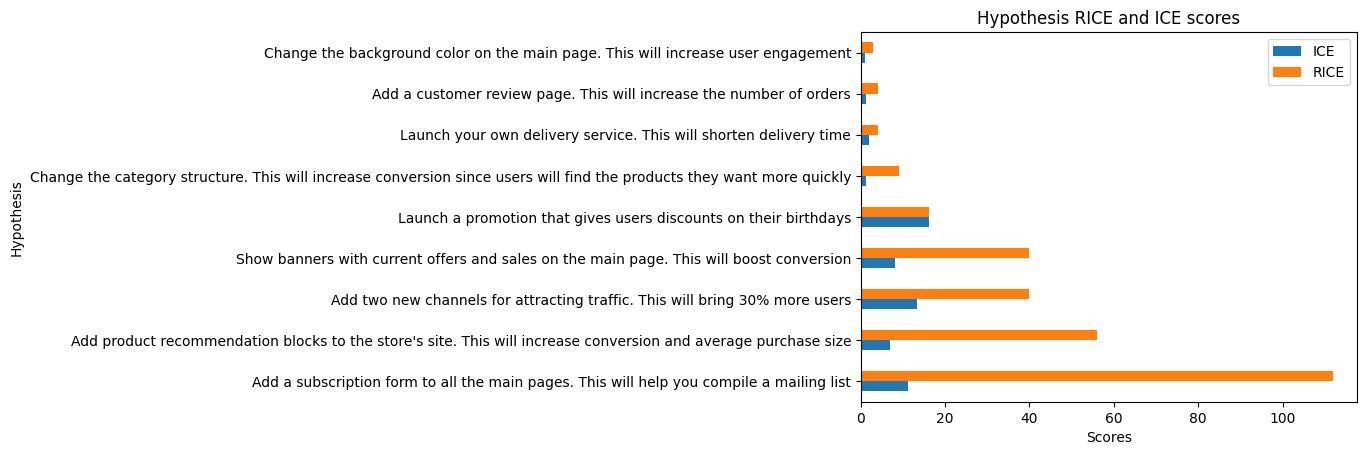

In [9]:
df_hypotheses[['hypothesis', 'ICE', 'RICE']].sort_values(by='RICE', ascending=False).plot(kind='barh', x='hypothesis', y=['ICE', 'RICE'], title='Hypothesis RICE and ICE scores', xlabel='Scores', ylabel='Hypothesis')
plt.show()

Se observa una diferencia relevante en la priorización de las hipótesis entre un framework y el otro.  
Según ICE, la hipótesis 9 es prioritaria, ya que tiene la mayor relación Impacto y Confianza vs. Esfuerzo.  
Aún así, al aplicar RICE (donde se incluye el alcance de las hipótesis) la hipótesis 9 queda en cuarto lugar de prioridad, ya que el alcance es muy bajo en comparación a las otras (es el menor alcance, inclusive). La **hipótesis 8** (índice 7) queda en primer lugar, superando sustancialmente a las otras hipótesis al poseer el mayor alcance y, a la vez, mantener también un alto impacto y confianza (aunque levemente menores a los de la hipótesis 9), requiriendo también el mismo esfuerzo que tenía la hipótesis 9 (esfuerzo intermedio).  
Por lo expuesto, se sugiere avanzar con la hipótesis 8: **"Add a subscription form to all the main pages. This will help you compile a mailing list"**

## Parte 2 - Análisis de test A/B

Se realizó un test A/B, recibiéndose los resultados en dos datasets:  
- Órdenes (orders_us.csv)  
- Visitas (visits_us.csv)  

Primeramente se preprocesarán los datos recibidos, para verificar que no tengan errores, y así proceder posteriormente al análisis de los resultados del test.

### Pre-procesamiento de datos

Inicialmente, se visualizarán los datasets y se verificarán que los tipos de datos sean correctos, y, caso contrario, se llevarán al tipo adecuado, a fin de preparar los datos para el análisis y optimizar los datasets.  
Se verificará, a través de la función error_detection() si los datasets presentan errores generales, como filas duplicadas y valores ausentes, y al mismo tiempo, llevar los títulos de columnas al formato snake_case.  
Posteriormente se evaluará si hay errores tales como un mismo usuario estar presente en ambos grupos de prueba, etc.  
También se aplicará el método describe() en las columnas en las que tenga relevancia, para obtener una visualización rápida de los datos.

#### Visitas

In [10]:
#Importación dataset y visualización del mismo
df_visits = pd.read_csv('./datasets/visits_us.csv', parse_dates=['date'])
df_visits.info()
df_visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
error_detection(df_visits)

Valores ausentes en columna date: 0
Valores ausentes en columna group: 0
Valores ausentes en columna visits: 0

Cantidad de filas duplicadas: 0



,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [12]:
df_visits.groupby('group')['visits'].count()

group
A    31
B    31
Name: visits, dtype: int64

In [13]:
df_visits.groupby(['date', 'group'])['visits'].sum()

date        group
2019-08-01  A        719
            B        713
2019-08-02  A        619
            B        581
2019-08-03  A        507
                    ... 
2019-08-29  B        531
2019-08-30  A        490
            B        490
2019-08-31  A        699
            B        718
Name: visits, Length: 62, dtype: int64

Conclusión:  
- No se detectan valores ausentes  
- No se detectan filas duplicadas  
- Las cantidades de datos en cada grupo es la misma, por lo que se estima que no existen errores en cuanto a la división de grupos.
- Las cantidades de visitas por día y por grupo no son iguales, pero se observa que en todos los días se presentan visitas de ambos grupos, dividíendose en forma más o menos equivalente.

#### Órdenes

In [14]:
#Importación dataset y visualización del mismo
df_orders = pd.read_csv('./datasets/orders_us.csv', parse_dates=['date'])
df_orders.info()
df_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [15]:
error_detection(df_orders)

Valores ausentes en columna transactionId: 0
Valores ausentes en columna visitorId: 0
Valores ausentes en columna date: 0
Valores ausentes en columna revenue: 0
Valores ausentes en columna group: 0

Cantidad de filas duplicadas: 0



,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [16]:
#Se cambia el nombre de las columnas transactionid y visitorid para una mejor legibilidad y comprensión:
df_orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
df_orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [17]:
df_orders.groupby('group').agg({'visitor_id':'nunique'})

,visitor_id
group,
A,503
B,586


Conclusión:  
- No se detectan valores ausentes  
- No se detectan filas duplicadas  
- Las cantidades de usuarios únicos en cada grupo no es la misma, por lo que podría haber visitantes que estén en ambos grupos. Se analizará eso a continuación.

In [18]:
#Se genera un slice para cada grupo
df_orders_A = df_orders.query('group == "A"')
df_orders_B = df_orders.query('group == "B"')

display(df_orders_A)
display(df_orders_B)

,transaction_id,visitor_id,date,revenue,group
2,2961555356,4069496402,2019-08-15,10.2,A
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
10,3649131742,879864040,2019-08-15,65.7,A
12,2809384911,3213223594,2019-08-15,115.4,A
...,...,...,...,...,...
1187,2274188238,132143192,2019-08-14,15.5,A
1188,1692103379,1022829655,2019-08-14,5.7,A
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1189,4082620617,393266494,2019-08-14,490.4,B
1190,38478481,1197745035,2019-08-14,135.3,B
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B


In [19]:
#Obtengo los valores únicos de 'visitor_id' para cada grupo
visitors_A_unique = pd.Series(df_orders_A['visitor_id'].unique())
visitors_B_unique = pd.Series(df_orders_B['visitor_id'].unique())

display(visitors_A_unique)
display(visitors_B_unique)

0      4069496402
1        78758296
2       295230930
3       879864040
4      3213223594
          ...    
498    2710193528
499     132143192
500    1022829655
501     370388673
502     573423106
Length: 503, dtype: int64

0      3312258926
1      3642806036
2      1196621759
3      2322279887
4       935554773
          ...    
581    2146711261
582    1197745035
583     608641596
584    3733762160
585    2108080724
Length: 586, dtype: int64

In [20]:
common_visitors = visitors_B_unique[visitors_B_unique.isin(visitors_A_unique)]
len(common_visitors)

58

Se observa que hay 58 visitantes que están en ambos grupos.  
Al ser mayor la cantidad de visitantes únicos en el grupo B, se estima que los visitantes duplicados pertenecían al grupo A. Se consideran las siguientes opciones:  
1. Si los visitantes repetidos ingresaron siempre bajo las condiciones del grupo A, entonces los registros que aparecen en el dataset como grupo B de los mismos, deberían pasar a ser del grupo A simplemente, sin eliminar ningún registro.
2. Si los visitantes repetidos aparecen en el grupo B porque entraron por error bajo las condiciones de dicho grupo, su comportamiento se correspondería al grupo B respectivamente, por lo que deberían permanecer en dicho grupo.  

Dado que la cantidad de visitantes únicos del grupo A es de 503, y del grupo B es 586, se estima que la opción 1 es la correcta, ya que de la otra forma el grupo B quedaría con un 16,5% de visitantes únicos por encima de los del grupo A. Con la opción 1, la diferencia en la cantidad de usuarios únicos del grupo B quedaría en 4,97% por encima del grupo A (528 del grupo B frente a 503 del grupo A), aunque también debe tenerse en cuenta que los 58 registros del grupo B pasarían a formar parte de los datos del grupo A.

In [21]:
#Reemplazo la designación de grupo de los visitantes repetidos en el grupo B
df_orders.loc[(df_orders['group'] == 'B') & (df_orders['visitor_id'].isin(common_visitors)), 'group'] = 'A'

#Redefino los slice por grupo
df_orders_A = df_orders.query('group == "A"')
df_orders_B = df_orders.query('group == "B"')

#Visualizo las tablas filtradas por grupo
display(df_orders_A)
display(df_orders_B)

#Verifico las cantidades de visitantes únicos para cada grupo
visitors_A_unique = pd.Series(df_orders_A['visitor_id'].unique())
visitors_B_unique = pd.Series(df_orders_B['visitor_id'].unique())

print()
print('La cantidad de visitantes únicos del grupo A son:', len(visitors_A_unique))
print('La cantidad de visitantes únicos del grupo B son:', len(visitors_B_unique))

,transaction_id,visitor_id,date,revenue,group
2,2961555356,4069496402,2019-08-15,10.2,A
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
10,3649131742,879864040,2019-08-15,65.7,A
12,2809384911,3213223594,2019-08-15,115.4,A
...,...,...,...,...,...
1188,1692103379,1022829655,2019-08-14,5.7,A
1189,4082620617,393266494,2019-08-14,490.4,A
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1186,2116724386,2146711261,2019-08-14,240.6,B
1190,38478481,1197745035,2019-08-14,135.3,B
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B



La cantidad de visitantes únicos del grupo A son: 503
La cantidad de visitantes únicos del grupo B son: 528


Habiéndose pre-procesado los datos, se aplicará ahora el método describe() sobre la columna 'revenue' para cada grupo, a fin de obtener una rápida visualización estadística de los mismos.

In [22]:
print('GRUPO A:')
display(df_orders_A['revenue'].describe())
print()
print('GRUPO B:')
display(df_orders_B['revenue'].describe())

GRUPO A:


count     649.000000
mean      119.790909
std       185.714439
min         5.000000
25%        20.700000
50%        50.400000
75%       130.900000
max      1450.200000
Name: revenue, dtype: float64


GRUPO B:


count      548.000000
mean       145.348905
std        868.228227
min          5.100000
25%         20.800000
50%         45.900000
75%        125.200000
max      19920.400000
Name: revenue, dtype: float64

Se observa que el 75% de los valores están en rangos similares entre ambos grupos, con una media del grupo B un poco mayor que la del grupo A.  
En el grupo B se observa la posible precencia de valores atípicos, que producen una desviación estándar mucho mayor que la del grupo A, observándose en ese sentido también que el valor máximo del grupo B es casi 14 veces mayor que el máximo del grupo A.  
A continuación se procederá al análisis del test A/B en forma detallada.

### 2.1 Ingreso acumulado por grupo

Se representará gráficamente en el presente apartado los ingresos acumulados por grupo. Para esto, se crearán dataframes con los datos acumulados de órdenes y visitantes, para luego fusionarlos en un único dataframe de datos acumulados.

In [23]:
#Creo un dataframe con pares fecha-grupo únicos
dates_groups = df_orders[['date','group']].drop_duplicates()

# Obtengo los datos diarios acumulados agregados sobre las órdenes
orders_aggregated = dates_groups.apply(
    lambda x: df_orders[
        np.logical_and(df_orders["date"] <= x["date"], df_orders["group"] == x["group"])
    ].agg(
        {
            "date": "max",
            "group": "max",
            "transaction_id": pd.Series.nunique,
            "visitor_id": pd.Series.nunique,
            "revenue": "sum",
        }
    ),
    axis=1,
).sort_values(by=["date", "group"])

orders_aggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,28,23,3009.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,49,41,4568.8
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,75,67,7119.2


In [24]:
# Obtengo los datos diarios acumulados agregados sobre las visitas
visits_aggregated = dates_groups.apply(
    lambda x: df_visits[
        np.logical_and(df_visits["date"] <= x["date"], df_visits["group"] == x["group"])
    ].agg(
        {
            "date": "max",
            "group": "max",
            "visits": "sum",
        }
    ),
    axis=1,
).sort_values(by=["date", "group"])

visits_aggregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [25]:
#Genero el dataframe de datos acumulados fusionando los dos anteriores
cumulative_data = orders_aggregated.merge(visits_aggregated, left_on=["date", "group"], right_on=["date", "group"])
cumulative_data.columns = ['date', 'group', 'orders', 'visitors_unique', 'revenue', 'visits']
cumulative_data.head()

,date,group,orders,visitors_unique,revenue,visits
0,2019-08-01,A,28,23,3009.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,49,41,4568.8,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,75,67,7119.2,1845


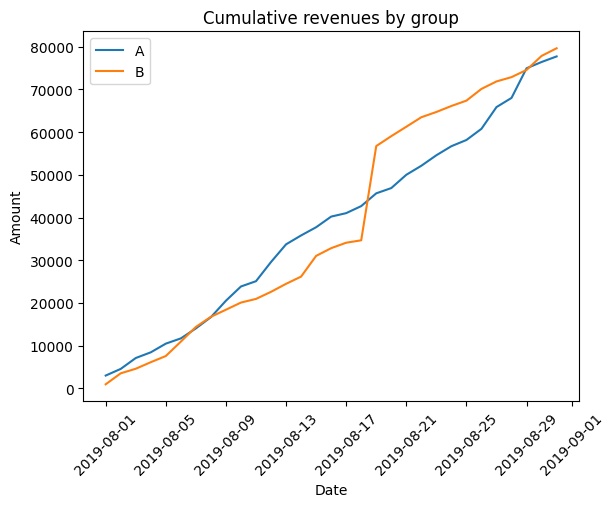

In [26]:
#Extraigo del dataframe con datos acumulados los ingresos por día y por grupo
cumulative_revenue_A = cumulative_data[cumulative_data["group"] == "A"][["date", "revenue", "orders"]]
cumulative_revenue_B = cumulative_data[cumulative_data["group"] == "B"][["date", "revenue", "orders"]]

#Grafico los igresos acumulados por día y por grupo
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')
plt.title('Cumulative revenues by group')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Conclusiones:  
- Se observa que en ambos grupos los ingresos aumentan durante toda la prueba.  
- El grupo A tiene un aumento de los ingresos más o menos uniforme, de donde se podría percibir que es probable que no existan valores atípicos.  
- El grupo B tiene un pico con un aumento del ingreso de importancia, lo cual puede estar indicando que hay algunos valores atípicos en la muestra.

### 2.2 Tamaño de pedido promedio acumulado por grupo

A partir del análisis previo, y utilizando la tabla fusionada, se representará gráficamente a continuación el tamaño de pedido promedio acumulado por fecha y por grupo.

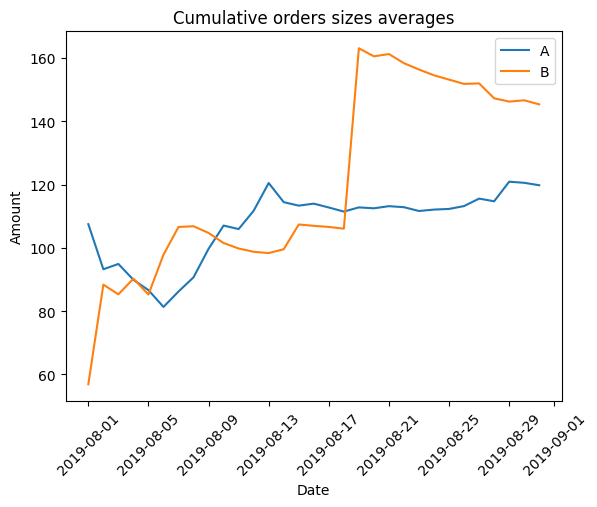

In [27]:
#Grafico el tamaño de pedido promedio acumulado por día y por grupo
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'] / cumulative_revenue_A['orders'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'] / cumulative_revenue_B['orders'], label='B')
plt.title('Cumulative orders sizes averages')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Conclusiones:  
- Pareciera que el tamaño de pedido promedio va estabilizándose para el grupo A, mientras que para el grupo B pareciera ir disminuyendo.  
- Al igual que en el gráfico anterior, se observa un importante pico en el tamaño de pedido promedio del grupo B, lo cual parece confirmar la presencia de valores atípicos en dicho grupo (situación que también se observó en la visualización preliminar del dataset en la Parte 1 del presente análisis)

### 2.3 Diferencia relativa en el tamaño de pedido promedio acumulado

Se representará gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.

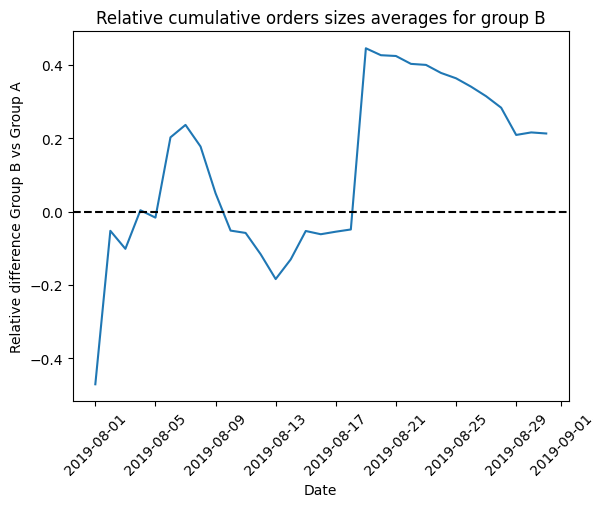

In [28]:
#Fusiono los dataframe de cada grupo, para poder obtener los valores relativos entre ambos
cumulative_revenue_merged = cumulative_revenue_A.merge(cumulative_revenue_B, left_on="date", right_on="date", how="left", suffixes=["A", "B"])

# trazo un gráfico de diferencia relativa para los tamaños de pedido promedio
plt.plot(cumulative_revenue_merged["date"], ((cumulative_revenue_merged["revenueB"] / cumulative_revenue_merged["ordersB"]) / (cumulative_revenue_merged["revenueA"] / cumulative_revenue_merged["ordersA"])) - 1,)

# agrego el eje X y doy formato al gráfico
plt.axhline(y=0, color="black", linestyle="--")
plt.title('Relative cumulative orders sizes averages for group B')
plt.xlabel('Date')
plt.ylabel('Relative difference Group B vs Group A')
plt.xticks(rotation=45)
plt.show()


Conclusiones:  
- Se presentan variaciones relativas en los tamaños de pedido acumulados promedio entre los dos grupos.  
- Al igual que en los gráficos analizados anteriormente, se observa la influencia de valores que parecen anómalos en el tamaño de los pedidos del grupo B, que generan un pico importante, pero que posteriormente comienza a disminuir.  
- Al final del período del experimento, parece que tiende a estabilizarse. Deberá evaluarse nuevamente luego de tratar dichos valores anómalos, para poder observar en qué valor comienza a estabilizarse.

### 2.4 Tasas de conversión

Se determinará a continuación la tasa de conversión de cada grupo, como la relación entre los pedidos y el número de visitas de cada día. Luego se representará gráficamente las tasas de conversión diarias de los dos grupos.

In [29]:
#Creo una nueva columna en el dataframe de valores acumulados con la tasa de conversión
cumulative_data["conversion"] = cumulative_data["orders"] / cumulative_data["visits"]
cumulative_data.head()

,date,group,orders,visitors_unique,revenue,visits,conversion
0,2019-08-01,A,28,23,3009.6,719,0.038943
1,2019-08-01,B,17,17,967.2,713,0.023843
2,2019-08-02,A,49,41,4568.8,1338,0.036622
3,2019-08-02,B,40,39,3535.3,1294,0.030912
4,2019-08-03,A,75,67,7119.2,1845,0.040650


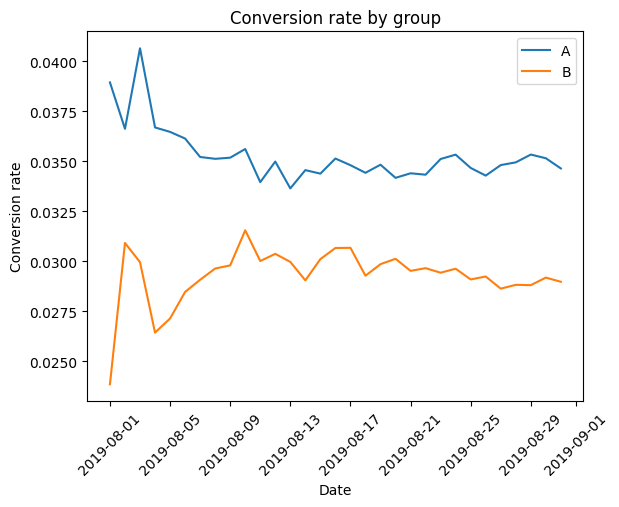

In [30]:
#Creo un slice para cada grupo
cumulative_data_A = cumulative_data[cumulative_data["group"] == "A"]
cumulative_data_B = cumulative_data[cumulative_data["group"] == "B"]

#Trazo gráficos para cada grupo
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')
plt.title('Conversion rate by group')
plt.xlabel('Date')
plt.ylabel('Conversion rate')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Conclusiones:  
- La tasa de conversión del grupo A se mantuvo durante el test por encima de la correspondiente al grupo B.  
- Ambas tasas tienden a estabilizarse, por lo que la duración del experimento parece ser la adecuada.  
- En este gráfico, que es independiente de valores anómalos de compras, se puede concluir que la opción B está generando menor cantidad de compras que la opción A.

### 2.5 Número de pedidos por usuario

Se representará gráficamente por medio de un gráfico de dispersión el número de pedidos por usuario, a fin de visualizar valores anómalos en los mismos.  
El gráfico se hará sin distinción de grupo, ya que se busca evaluar si hay un comportamiento anómalo, independientemente del grupo.

In [31]:
#Creo un nuevo dataframe con las cantidades de pedidos de cada usuario
orders_by_users = (
    df_orders.drop(["group", "revenue", "date"], axis=1)
    .groupby("visitor_id", as_index=False)
    .agg({"transaction_id": pd.Series.nunique})
)
orders_by_users.columns = ["visitor_id", "orders"]

orders_by_users.head()

,visitor_id,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


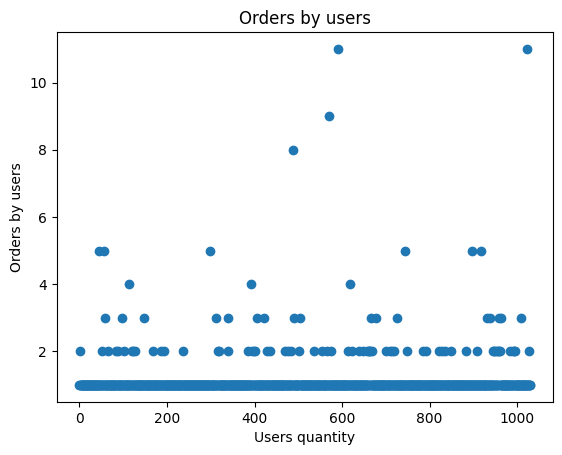

In [32]:
#Represento gráficamente para el rango de usuarios, la cantidad de pedidos que cada uno realizó
plt.scatter(pd.Series(range(0, len(orders_by_users['orders']))), orders_by_users['orders'])
plt.title('Orders by users')
plt.xlabel('Users quantity')
plt.ylabel('Orders by users')
plt.show()

Conclusiones:  
- Se observa gráficamente que la mayoría de los usuarios realizó entre 1 y 2 pedidos.  
- Se observan algunos usuarios que realizaron entre 2 y 4 pedidos.  
- Hay solo 4 pedidos que realizaron más de 8 pedidos.  

Visualmente, se puede concluir que, con seguridad, por encima de 8 pedidos por usuarios demuestra un comportamiento anómalo. Aún así, para fijar el límite de anomalía, es conveniente calcular los percentiles del grupo de datos, lo que se realizará a continuación.

### 2.6 Percentiles de número de pedidos por usuario

Se determinarán los percentiles 95 y 99, a fin de definir el punto en el que un valor se transformará en anomalía.

In [33]:
display(orders_by_users.head())
print()
print('Percentiles (95 y 99):')
print(np.percentile(orders_by_users['orders'], [95, 99]))

,visitor_id,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1



Percentiles (95 y 99):
[2. 4.]


Conclusión:  
- Se observa que solamente el 5% de los usuarios realizaron más de 2 pedidos, y solamente el 1% realizó más de 4 pedidos.  

Por lo expuesto, se fija en **4** el número de pedidos límite para no considerar anomalía.

### 2.7 Precios de los pedidos

Se representará gráficamente por medio de un gráfico de dispersión los precios de los pedidos, a fin de visualizar valores anómalos en los mismos.  
El gráfico se hará sin distinción de grupo, ya que se busca evaluar si hay un comportamiento anómalo, independientemente del grupo.

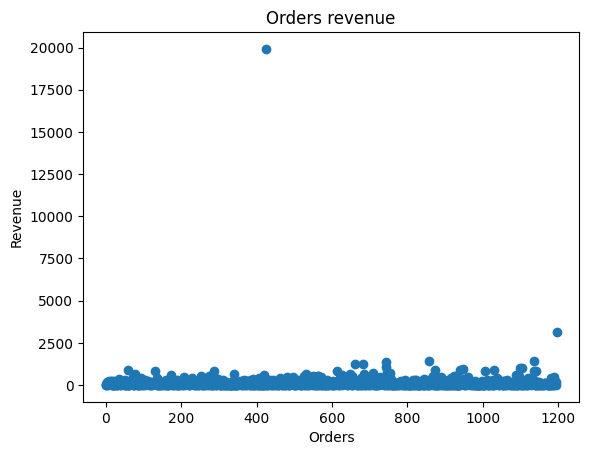

In [34]:
#Represento gráficamente para el rango de pedidos, el precio de cada uno
plt.scatter(pd.Series(range(0, len(df_orders['revenue']))), df_orders['revenue'])
plt.title('Orders revenue')
plt.xlabel('Orders')
plt.ylabel('Revenue')
plt.show()

Conclusiones:  
- Se observa rápidamente que la gran mayoría de los pedidos fueron por un monto menor de 2500.  
- Se observan dos pedidos claramente anómalos, con montos de aproximadamente 2500 uno de ellos, y 20000 el segundo.  

Los dos valores que se encuentran por encima de 2500 son anómalos, pero aún así, para fijar el límite de anomalía, es necesario determinar los percentiles del rango de valores.

### 2.8 Percentiles de precios de pedidos

Se determinarán los percentiles 95 y 99, a fin de definir el punto en el que un valor se transformará en anomalía.

In [35]:
print('Percentiles (95 y 99):')
print(np.percentile(df_orders['revenue'], [95, 99]))

Percentiles (95 y 99):
[435.54  900.904]


Conclusión:  
- Se observa que el 95% de los pedidos realizados fueron de un monto menor a 435.54, y el 99% fue menor a 900.94.  

Por lo expuesto, se fija en **440** el monto de pedido límite para no considerar anomalía.

### 2.9 Datos en bruto. Significancia estadística de la diferencia en la conversión.

Se encontrará la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto, es decir, sin filtrar las anomalías. Se aplicará la prueba de Mann-Whitney.

In [36]:
df_orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [37]:
#Creo dataframes para ambos grupos, contabilizando la cantidad de pedidos por usuario
orders_by_users_A = df_orders[df_orders['group'] == 'A'].groupby("visitor_id", as_index=False).agg({"transaction_id": pd.Series.nunique})
orders_by_users_A.columns = ["visitor_id", "orders"]
print('Oreders by users group A:')
display(orders_by_users_A.head())

print()

orders_by_users_B = df_orders[df_orders['group'] == 'B'].groupby("visitor_id", as_index=False).agg({"transaction_id": pd.Series.nunique})
orders_by_users_B.columns = ["visitor_id", "orders"]
print('Oreders by users group B:')
display(orders_by_users_B.head())

Oreders by users group A:


,visitor_id,orders
0,8300375,2
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1



Oreders by users group B:


,visitor_id,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


Es necesario armar un objeto Series con la totalidad de los visitantes para cada grupo, incluyendo a los que no realizaron pedidos, a fin de realizar la prueba de Mann-Whitney. Para ello, se debe crear objetos pd.Series con la longitud que surge de la diferencia de visitas totales y la cantidad total de visitas de los usuarios que realizaron pedidos para cada grupo, y asignar a cada uno de esos visitantes la cantidad de pedidos "0", concatenando posteriormente dicho objeto con la columna de pedidos de cada grupo. Dichos Series concatenados se llamarán sample_A y sample_B respectivamente.

In [59]:
#Declaro las variables sample_A y sample_B
sample_A = pd.concat(
    [
    orders_by_users_A['orders'],
    pd.Series(0, index=np.arange(df_visits[df_visits['group'] == 'A']['visits'].sum() - len(orders_by_users_A['orders'])), name='orders')
    ],
    axis=0)

sample_B = pd.concat(
    [
    orders_by_users_B['orders'],
    pd.Series(0, index=np.arange(df_visits[df_visits['group'] == 'B']['visits'].sum() - len(orders_by_users_B['orders'])), name='orders')
    ],
    axis=0)

print('sample_A:')
display(sample_A.head())
print()
print('sample_B:')
display(sample_B.head())

sample_A:


0    2
1    1
2    1
3    1
4    1
Name: orders, dtype: int64


sample_B:


0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [62]:
#Realizo la prueba de Mann-Whitney, redondeando a 3 decimales
print("Valor p: {0:.3f}".format(st.mannwhitneyu(sample_A, sample_B)[1]))

print("Diferencia relativa de medias grupo 'B' vs. grupo 'A': {0:.3f}".format(sample_B.mean() / sample_A.mean() - 1))

Valor p: 0.561
Diferencia relativa de medias grupo 'B' vs. grupo 'A': -0.164


Conclusión:  
- Con los datos sin procesar, no se puede rechazar la hipótesis nula, que establece que no hay diferencia en la conversión entre los grupos A y B.  
- Aún así, la pérdida relativa del grupo B respecto del grupo A es del 16.4%.

### 2.10 Datos en bruto. Significancia estadística de la diferencia en el tamaño promedio de pedido.

Se determinará a continuación la significancia estadística de la diferencia en el tamaño promedio de pedidos entre los grupos, utilizando los datos sin procesar, y aplicando la prueba de Mann-Whithney.

In [63]:
#Realizo la prueba de Mann-Whitney para el tamaño promedio de los pedidos, redondeando a 3 decimales
print("Valor p: {0:.3f}".format(st.mannwhitneyu(df_orders[df_orders["group"] == "A"]["revenue"], df_orders[df_orders["group"] == "B"]["revenue"])[1]))

print("Diferencia relativa de medias en tamaño de pedidos grupo 'B' vs. grupo 'A': {0:.3f}".format(df_orders[df_orders["group"] == "B"]["revenue"].mean() / df_orders[df_orders["group"] == "A"]["revenue"].mean() - 1))

Valor p: 0.496
Diferencia relativa de medias en tamaño de pedidos grupo 'B' vs. grupo 'A': 0.213


Conclusión:  
- Con los datos sin procesar, no se puede rechazar la hipótesis nula, que establece que no hay diferencia en el tamaño promedio de pedidos entre los grupos A y B.  
- Aún así, el tamaño medio de pedido del grupo B respecto del grupo A es un 21.3% mayor.

### 2.11 Datos filtrados. Significancia estadística de la diferencia en la conversión.

Se aplicarán los criterios de filtrado de valores anómalos, según se especificó en los apartados 2.6 y 2.8, descriptos a continuación:  
- Se fija en **4** el número de pedidos límite para no considerar anomalía.
- Se fija en **440** el tamaño de pedido límite para no considerar anomalía.

Se determinarán los usuarios que tuvieron un comportamiento anómalo bajo alguna de las condiciones anteriores, y se los eliminará en el presente análisis.

In [65]:
#Creo un objeto Series con los usuarios anómalos
users_with_many_orders = pd.concat(
    [
        orders_by_users_A[orders_by_users_A["orders"] > 4]["visitor_id"],
        orders_by_users_B[orders_by_users_B["orders"] > 4]["visitor_id"],
    ],
    axis=0,
)

users_with_expensive_orders = df_orders[df_orders["revenue"] > 440]["visitor_id"]

anormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(anormal_users.head())
print(len(anormal_users))

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitor_id, dtype: int64
63


In [66]:
#Elimino los usuarios anómalos, y declaro nuevas variables sample_filtered_A y sample_filtered_B
sample_filtered_A = pd.concat(
    [
    orders_by_users_A[np.logical_not(orders_by_users_A["visitor_id"].isin(anormal_users))]['orders'],
    pd.Series(0, index=np.arange(df_visits[df_visits['group'] == 'A']['visits'].sum() - len(orders_by_users_A['orders'])), name='orders')
    ],
    axis=0)

sample_filtered_B = pd.concat(
    [
    orders_by_users_B[np.logical_not(orders_by_users_B["visitor_id"].isin(anormal_users))]['orders'],
    pd.Series(0, index=np.arange(df_visits[df_visits['group'] == 'B']['visits'].sum() - len(orders_by_users_B['orders'])), name='orders')
    ],
    axis=0)

print('sample_filtered_A:')
display(sample_filtered_A.head())
print()
print('sample_filtered_B:')
display(sample_filtered_B.head())

sample_filtered_A:


0    2
1    1
2    1
3    1
4    1
Name: orders, dtype: int64


sample_filtered_B:


0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [67]:
#Realizo la prueba de Mann-Whitney, redondeando a 3 decimales
print("Valor p: {0:.3f}".format(st.mannwhitneyu(sample_filtered_A, sample_filtered_B)[1]))

print("Diferencia relativa de medias grupo 'B' vs. grupo 'A': {0:.3f}".format(sample_filtered_B.mean() / sample_filtered_A.mean() - 1))

Valor p: 0.330
Diferencia relativa de medias grupo 'B' vs. grupo 'A': -0.052


Conslusión:  
- Con los datos filtrados tampoco se puede rechazar la hipótesis nula, que establece que no hay diferencia en la conversión entre los grupos A y B, ya que p=33%, bastante superior al nivel de significancia estadística de 5%.  
- La pérdida relativa del grupo B respecto del grupo A bajó del 16.4% al 5.2%, lo que demuestra que los comportamientos anómalos tenían una influencia relevante en los anteriores resultados, y que la conversión del grupo A no fue tan superior a la del grupo B.

### 2.12 Datos filtrados. Significancia estadística de la diferencia en el tamaño promedio de pedido.

Se determinará a continuación la significancia estadística de la diferencia en el tamaño promedio de pedidos entre los grupos, filtrando los datos para eliminar los usuarios anómalos, según los criterios del apartado anterior. Al igual que en las pruebas anteriores, se aplicará la prueba de Mann-Whithney.

In [68]:
#Realizo la prueba de Mann-Whitney para el tamaño promedio de los pedidos, redondeando a 3 decimales, y extrayendo de los datos a los usuarios con comportamiento anómalo
print("Valor p: {0:.3f}".format(st.mannwhitneyu(
    df_orders[
        np.logical_and(
            df_orders["group"] == "A",
            np.logical_not(df_orders['visitor_id'].isin(anormal_users))
            )
        ]["revenue"],
    df_orders[
        np.logical_and(
            df_orders["group"] == "B",
            np.logical_not(df_orders['visitor_id'].isin(anormal_users))
            )
        ]["revenue"]
    )[1]))

print("Diferencia relativa de medias en tamaño de pedidos grupo 'B' vs. grupo 'A': {0:.3f}".format(
    df_orders[
        np.logical_and(
            df_orders["group"] == "B",
            np.logical_not(df_orders['visitor_id'].isin(anormal_users))
            )
        ]["revenue"].mean() / df_orders[
        np.logical_and(
            df_orders["group"] == "A",
            np.logical_not(df_orders['visitor_id'].isin(anormal_users))
            )
        ]["revenue"].mean() - 1))

Valor p: 0.740
Diferencia relativa de medias en tamaño de pedidos grupo 'B' vs. grupo 'A': -0.049


Conclusión:  
- Con los datos filtrados tampoco se puede rechazar la hipótesis nula, que establece que no hay diferencia en el tamaño promedio de pedidos entre los grupos A y B, ya que p=74%, muy superior al nivel de significancia estadística de 5%.
- Aún así, el tamaño medio de pedido del grupo B respecto del grupo A pasó de ser un 21.3% mayor a ser un 4.9% menor, lo cual demustra una importante influencia de los valores anómalos. Esto demuestra que los picos observados en los apartados 2.1, 2.2 y 2.3 eran, en efecto, debido a un comportamiento anómalo de usuarios pertenecientes al grupo B.

### 2.13 CONCLUSIÓN DE LA PRUEBA

En función del análisis de los resultados de la prueba A/B, se decide parar la prueba, ya que las métricas se estabilizaron en el período de prueba. Se considera al **grupo A** como el líder, por las siguientes razones (las siguientes consideraciones se realizan sobre los resultados sin la influencia de los usuarios anómalos):  
- Los ingresos acumulados por grupo del grupo A son mayores que los del B.  
- El tamaño promedio de pedidos del grupo A, luego de estabilizarse, es mayor (levemente) que el del grupo B.  
- La conversión de los visitantes del grupo A fue mayor (levemente) que la de los correspondientes al grupo B.